In [2684]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, f1_score
from sklearn.ensemble import  GradientBoostingClassifier, RandomForestClassifier, StackingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import VotingClassifier, StackingClassifier, ExtraTreesClassifier, HistGradientBoostingClassifier

In [2686]:
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier

In [2687]:
import warnings
warnings.filterwarnings("ignore")

# Understating the Business problem

- PassengerID: Unique identifier for each passenger.
- Pclass: Passenger class (1st, 2nd, 3rd).
- Name: Full name of the passenger.
- Sex: Gender of the passenger.
- Age: Age of the passenger.
- SibSp: Number of siblings/spouses aboard.
- Parch: Number of parents/children aboard.
- Ticket: Ticket number.
- Fare: Ticket fare.
- Cabin: Cabin number.
- Embarked: Port of embarkation (C = Cherbourg; Q = Queenstown; S = Southampton).
- Survived: Survival status (0 = No; 1 = Yes).

In [2688]:
df=pd.read_csv("train.csv")

In [2689]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# Exploratory Data Analysis (EDA)

In [2690]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [2691]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2692]:
df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
496,497,1,1,"Eustis, Miss. Elizabeth Mussey",female,54.0,1,0,36947,78.2667,D20,C
70,71,0,2,"Jenkin, Mr. Stephen Curnow",male,32.0,0,0,C.A. 33111,10.5000,NaN,S
264,265,0,3,"Henry, Miss. Delia",female,NaN,0,0,382649,7.7500,NaN,Q
137,138,0,1,"Futrelle, Mr. Jacques Heath",male,37.0,1,0,113803,53.1000,C123,S
717,718,1,2,"Troutt, Miss. Edwina Celia ""Winnie""",female,27.0,0,0,34218,10.5000,E101,S


In [2693]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [2694]:
df.describe(include="object")

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


# Check for data types

In [2695]:
dtypes=df.dtypes
uniques=df.nunique()
pd.DataFrame({"Data type":dtypes,"Uniques":uniques}).T

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Data type,int64,int64,int64,object,object,float64,int64,int64,object,float64,object,object
Uniques,891,2,3,891,2,88,7,7,681,248,147,3


# Check Null

In [2696]:
df.shape[0]

891

In [2697]:
missing_df=pd.DataFrame({"Null %":(df.isnull().sum()/df.shape[0])*100,"Null Count":(df.isnull().sum())}).sort_values(by="Null %",ascending=False)

In [2698]:
missing_df[missing_df["Null Count"]>0].T

,Cabin,Age,Embarked
Null %,77.104377,19.86532,0.224467
Null Count,687.000000,177.00000,2.000000


In [2699]:
def check_missing_values(df):
  """
  Checks and summarizes missing values in a DataFrame.

  Parameters:
      df (pd.DataFrame): The DataFrame to analyze.

  Returns:
      pd.DataFrame: A summary table showing the count and percentage of missing values for each column.
  """
  missing_counts=df.isnull().sum()
  missing_precentage=(missing_counts/len(df))*100
  missing_df=pd.DataFrame({
      "Missing Count":missing_counts,
      "Missing Precentage":missing_precentage
  }).sort_values(by="Missing Precentage",ascending=False)
  return missing_df[missing_df["Missing Count"]>0]



In [2700]:
check_missing_values(df).T

,Cabin,Age,Embarked
Missing Count,687.000000,177.00000,2.000000
Missing Precentage,77.104377,19.86532,0.224467


In [2701]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# Handle Null Values

In [2702]:
# Age

df['Age'].fillna(df['Age'].median(), inplace=True)  

In [2703]:
# Embarked

df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

In [2704]:
check_missing_values(df).T

,Cabin
Missing Count,687.000000
Missing Precentage,77.104377


In [2705]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [2706]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Check for Outliers

In [2707]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [2708]:
num_cols=df.select_dtypes(include=[ 'float64'])
num_cols

,Age,Fare
0,22.0,7.2500
1,38.0,71.2833
2,26.0,7.9250
3,35.0,53.1000
4,35.0,8.0500
...,...,...
886,27.0,13.0000
887,19.0,30.0000
888,28.0,23.4500
889,26.0,30.0000


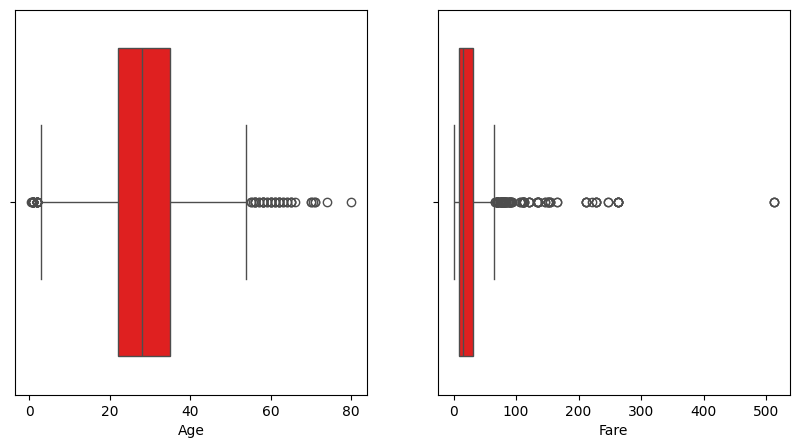

In [2709]:
plt.figure(figsize=(10,5))

# Age
plt.subplot(1,2,1)
sns.boxplot(x=df["Age"],color="red")

# Fare
plt.subplot(1,2,2)
sns.boxplot(x=df["Fare"],color="red")

plt.show()


In [2710]:
def plot_boxplots(data,columns,orient="h",):
  """
  Plots box plot for selected columns in a data DataFrame

  Parameters:
  data (pd.DataFrame): The DataFrame
  columns (pd.Series) : List of column to plot
  orient (str) : Orientation of the box plot
  figsize (tuple): Figure Size
  """
  plt.figure(figsize=(10,5))
  for index,col in enumerate(num_cols.columns,start=1):
    plt.subplot(1,2,index)
    plt.title(f"Box Plot {col}")
    sns.boxplot(data[col],color="red",orient=orient) 
  plt.show()


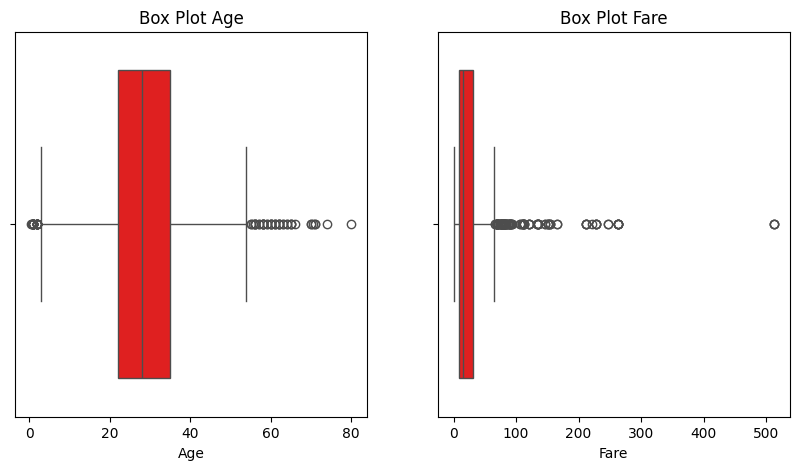

In [2711]:
plot_boxplots(data=df,columns=num_cols)

In [2712]:
def outlier_percentage(df):
    percentages = {}
    for col in df.select_dtypes(include=['float64']).columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col]
        percentages[col] = round(len(outliers) / len(df) * 100, 2)
    return pd.Series(percentages, name="Outlier %")

outlier_percentage(df)


Age      7.41
Fare    13.02
Name: Outlier %, dtype: float64

In [2713]:
def get_outlier_values(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] < lower_bound) | (df[column] > upper_bound)][column]


get_outlier_values(df, 'Fare')


1       71.2833
27     263.0000
31     146.5208
34      82.1708
52      76.7292
         ...   
846     69.5500
849     89.1042
856    164.8667
863     69.5500
879     83.1583
Name: Fare, Length: 116, dtype: float64

In [2714]:
df.Fare.max()

512.3292

In [2715]:
df.Fare.min()

0.0

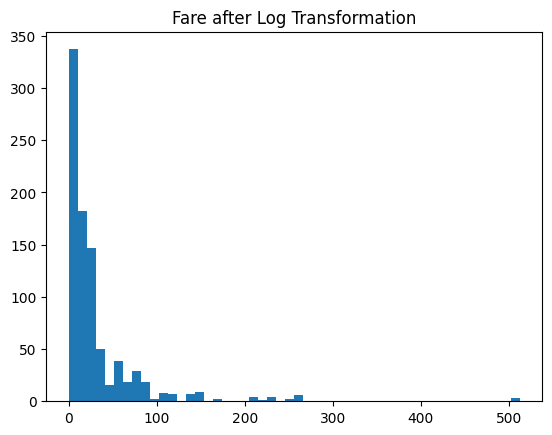

In [2716]:
plt.hist(df['Fare'], bins=50)
plt.title('Fare after Log Transformation')
plt.show()

In [2717]:
# Log transformation of Fare to reduce skewness


df['Fare'] = np.log1p(df['Fare'])   


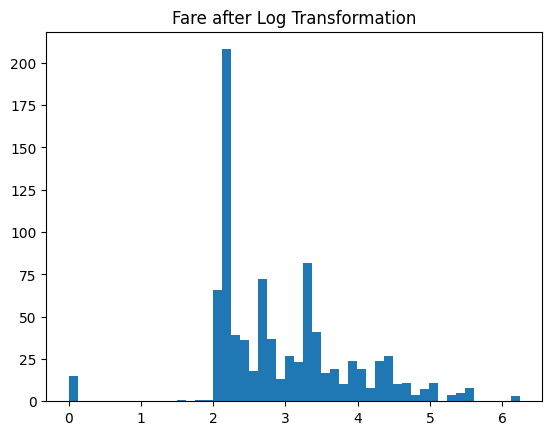

In [2718]:
plt.hist(df['Fare'], bins=50)
plt.title('Fare after Log Transformation')
plt.show()

In [2719]:
df.Age.min()

0.42

In [2720]:
df.Age.max()                 # Age will remain the same due to realistic values.

80.0

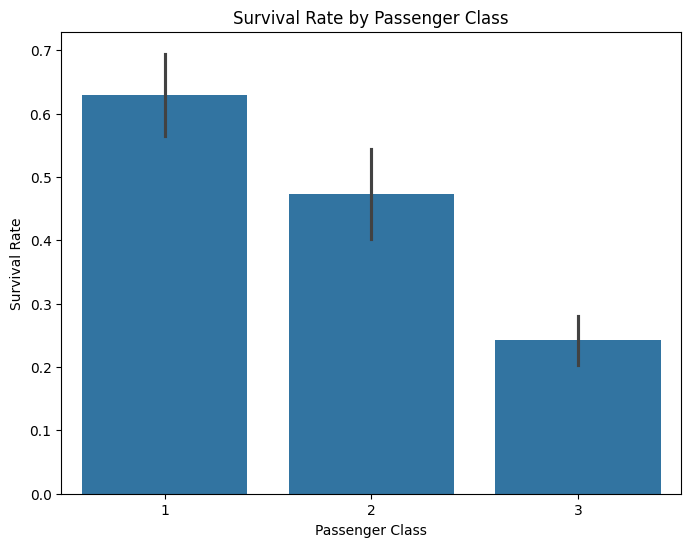

In [2721]:
plt.figure(figsize=(8, 6))
sns.barplot(data=df, x='Pclass', y='Survived', estimator=lambda x: x.mean())
plt.title('Survival Rate by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')
plt.show()

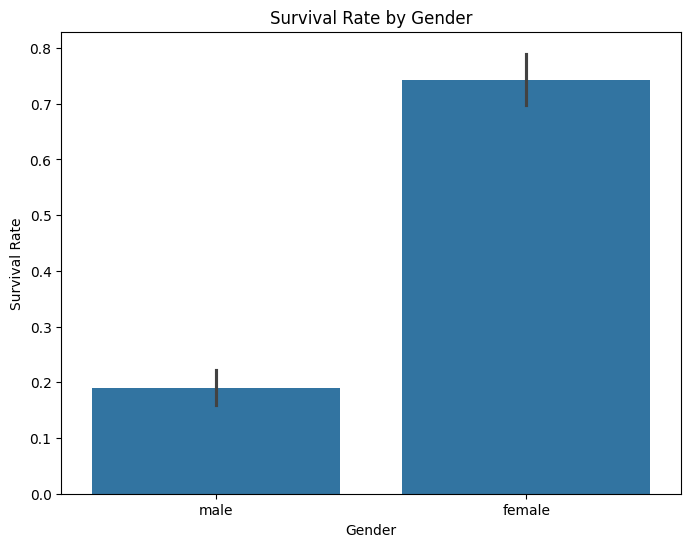

In [2722]:
plt.figure(figsize=(8, 6))
sns.barplot(data=df, x='Sex', y='Survived', estimator=lambda x: x.mean())
plt.title('Survival Rate by Gender')
plt.xlabel('Gender')
plt.ylabel('Survival Rate')
plt.show()

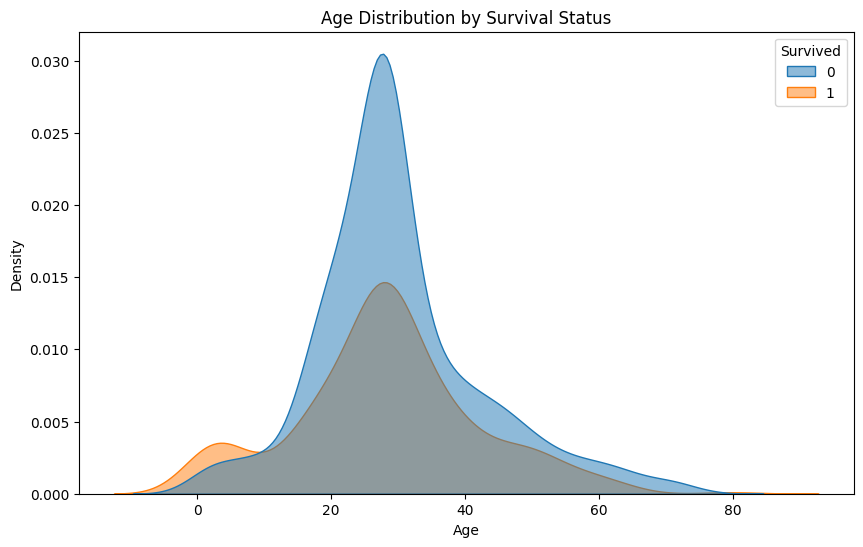

In [2723]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x='Age', hue='Survived', fill=True, alpha=0.5)
plt.title('Age Distribution by Survival Status')
plt.xlabel('Age')
plt.ylabel('Density')
plt.show()

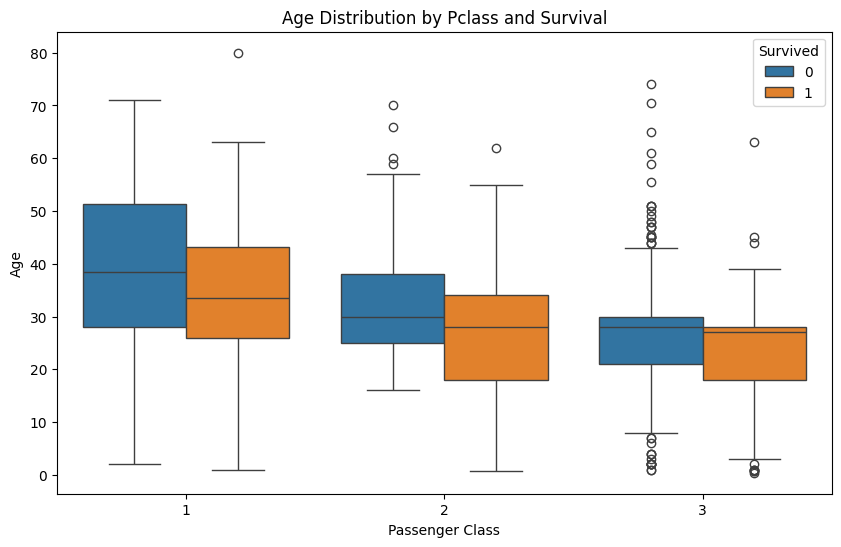

In [2724]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Pclass', y='Age', hue='Survived')
plt.title('Age Distribution by Pclass and Survival')
plt.xlabel('Passenger Class')
plt.ylabel('Age')
plt.show()

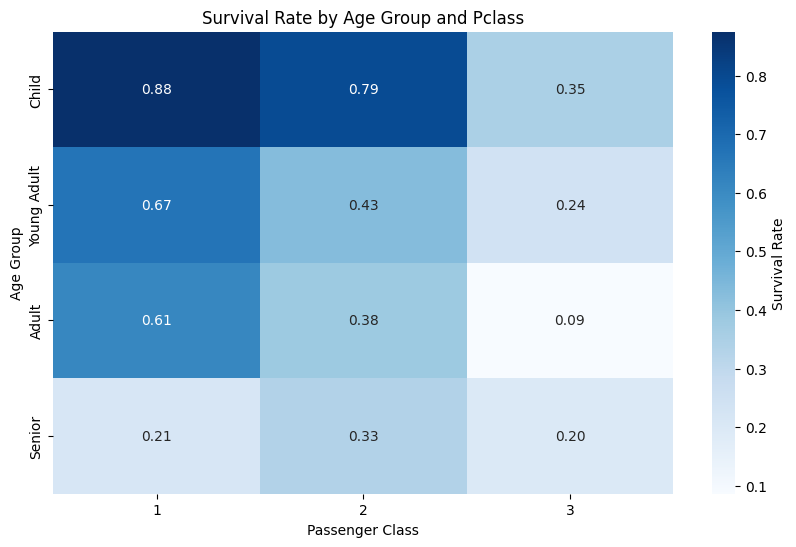

In [ ]:
Z=pd.cut(df['Age'], bins=[0, 18, 35, 60, 100], labels=['Child', 'Young Adult', 'Adult', 'Senior'])

pivot_table = df.pivot_table(index=Z, columns='Pclass', values='Survived', aggfunc='mean')

plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, annot=True, fmt='.2f', cmap='Blues', cbar_kws={'label': 'Survival Rate'})
plt.title('Survival Rate by Age Group and Pclass')
plt.xlabel('Passenger Class')
plt.ylabel('Age Group')
plt.show()

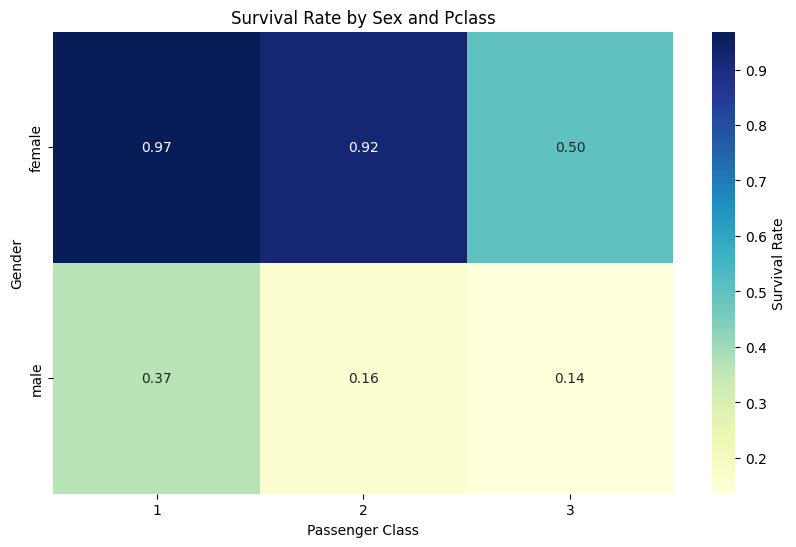

In [2726]:
pivot_table_sex_class = df.pivot_table(index='Sex', columns='Pclass', values='Survived', aggfunc='mean')

plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table_sex_class, annot=True, fmt='.2f', cmap='YlGnBu', cbar_kws={'label': 'Survival Rate'})
plt.title('Survival Rate by Sex and Pclass')
plt.xlabel('Passenger Class')
plt.ylabel('Gender')
plt.show()

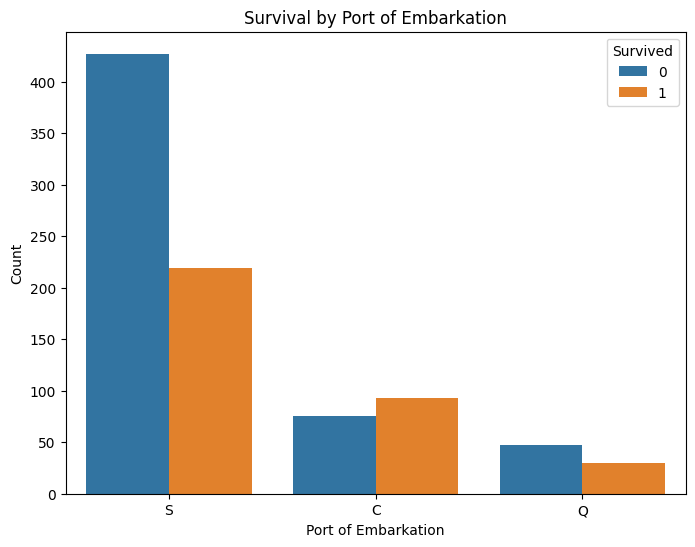

In [2727]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Embarked', hue='Survived')
plt.title('Survival by Port of Embarkation')
plt.xlabel('Port of Embarkation')
plt.ylabel('Count')
plt.show()

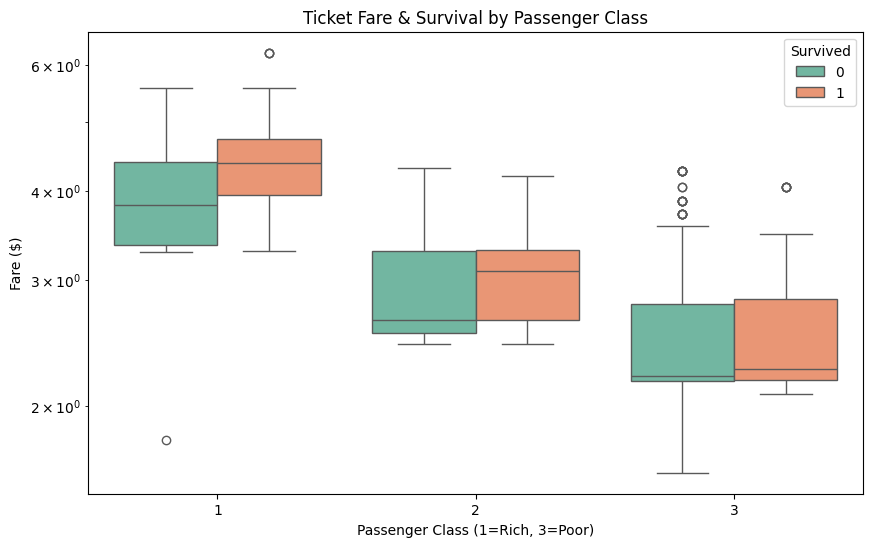

In [2728]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Pclass', y='Fare', hue='Survived', palette='Set2')
plt.title('Ticket Fare & Survival by Passenger Class')
plt.xlabel('Passenger Class (1=Rich, 3=Poor)')
plt.ylabel('Fare ($)')
plt.yscale('log') 
plt.show()

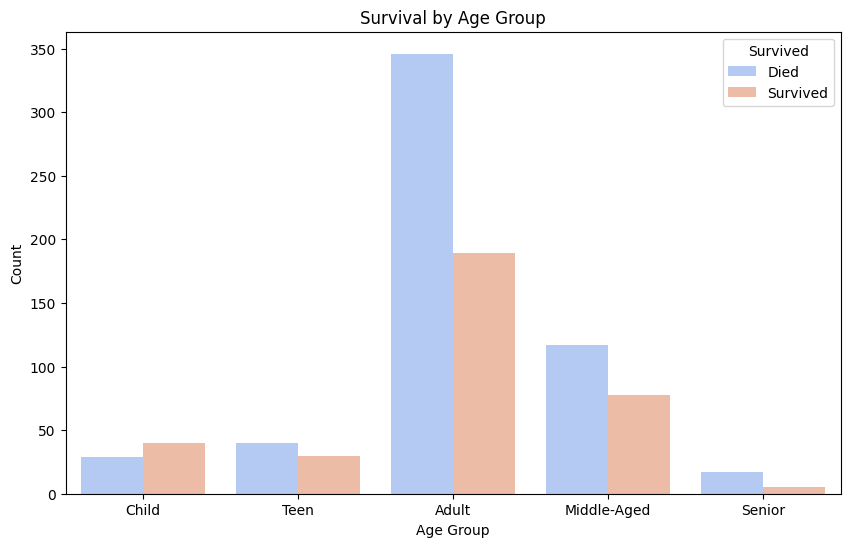

In [ ]:
Z=pd.cut(df['Age'], bins=[0, 12, 18, 35, 60, 100], labels=['Child', 'Teen', 'Adult', 'Middle-Aged', 'Senior'])

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x=Z, hue='Survived', palette='coolwarm')
plt.title('Survival by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.legend(title='Survived', labels=['Died', 'Survived'])
plt.show()

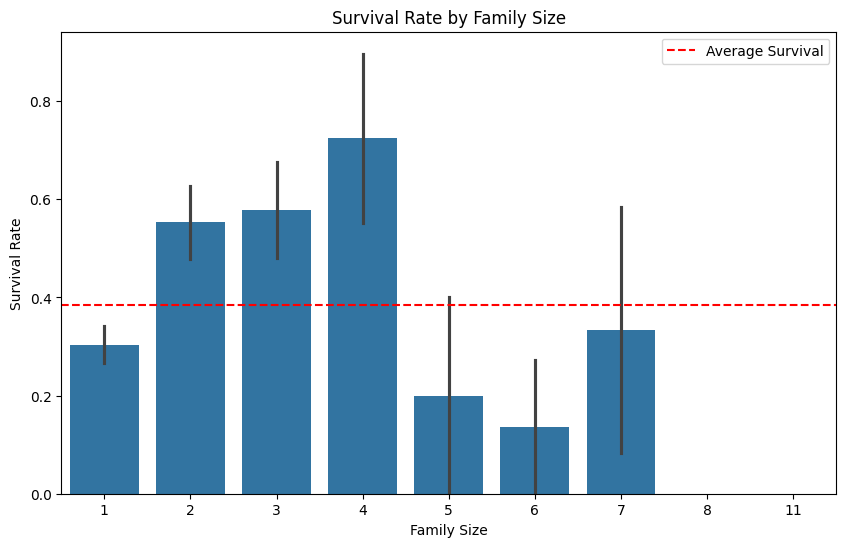

In [ ]:
z = df['SibSp'] + df['Parch'] + 1

plt.figure(figsize=(10, 6))
sns.barplot(data=df, x=z, y='Survived', estimator=lambda x: x.mean())
plt.title('Survival Rate by Family Size')
plt.xlabel('Family Size')
plt.ylabel('Survival Rate')
plt.axhline(df['Survived'].mean(), color='red', linestyle='--', label='Average Survival')
plt.legend()
plt.show()

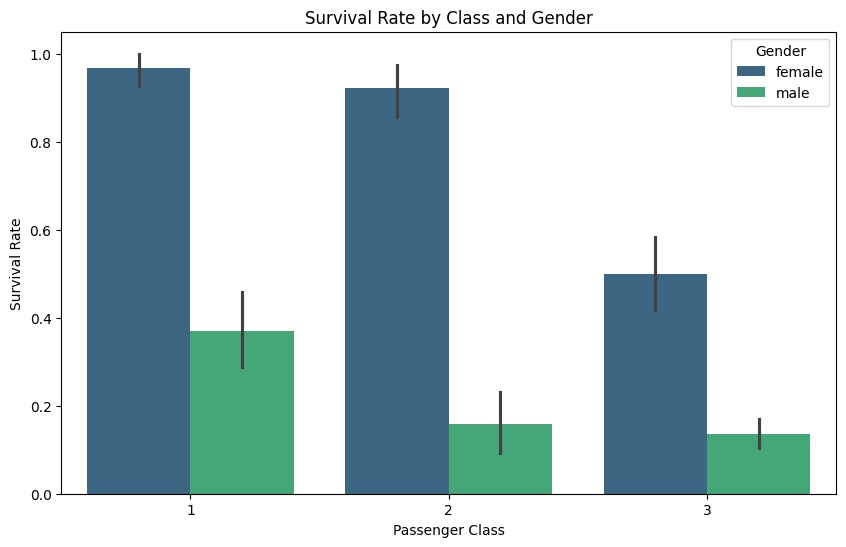

In [2731]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='Pclass', y='Survived', hue='Sex', palette='viridis')
plt.title('Survival Rate by Class and Gender')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')
plt.legend(title='Gender')
plt.show()

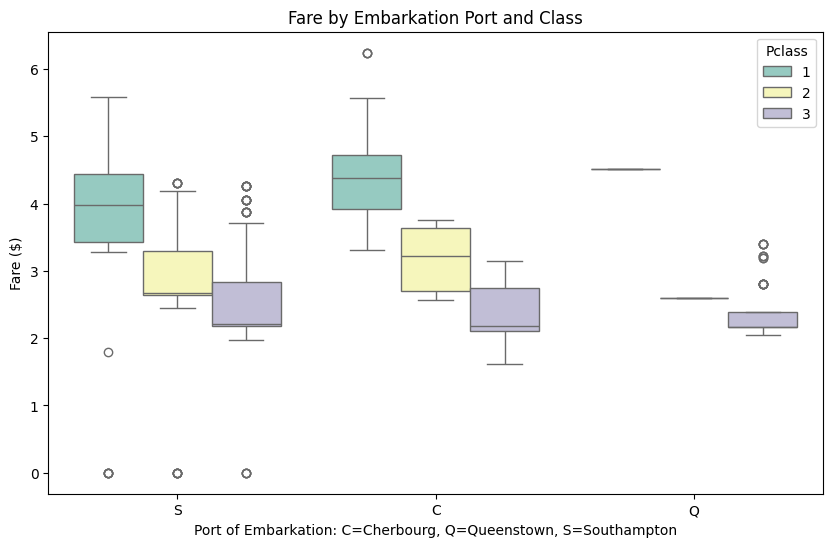

In [2732]:
embark_fare = df.groupby('Embarked')['Fare'].mean()

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Embarked', y='Fare', hue='Pclass', palette='Set3')
plt.title('Fare by Embarkation Port and Class')
plt.xlabel('Port of Embarkation: C=Cherbourg, Q=Queenstown, S=Southampton')
plt.ylabel('Fare ($)')
plt.show()

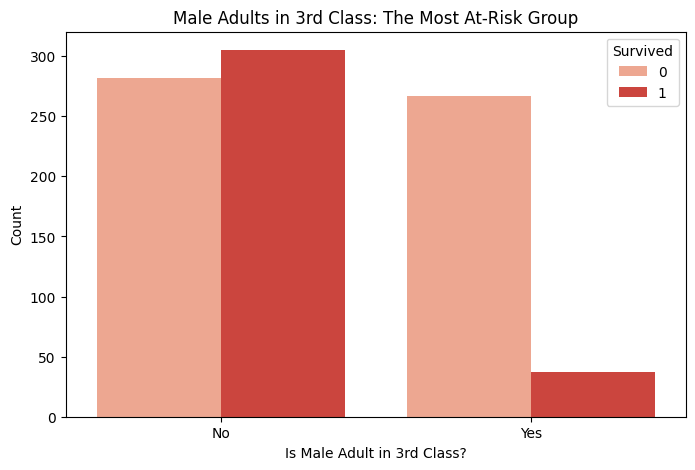

In [2733]:
z = (df['Pclass'] == 3) & (df['Sex'] == 'male') & (df['Age'] >= 18)

plt.figure(figsize=(8, 5))
sns.countplot(data=df, x=z, hue='Survived', palette='Reds')
plt.title('Male Adults in 3rd Class: The Most At-Risk Group')
plt.xlabel('Is Male Adult in 3rd Class?')
plt.ylabel('Count')
plt.xticks([0,1], ['No', 'Yes'])
plt.legend(title='Survived')
plt.show()

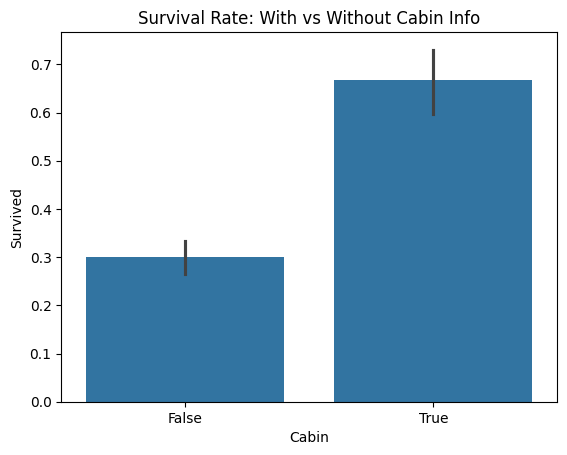

In [2734]:
z = df['Cabin'].notna()
sns.barplot(data=df, x=z, y='Survived')
plt.title('Survival Rate: With vs Without Cabin Info')
plt.show()

# Check Duplicates

In [2735]:
df.duplicated().sum()

0

# Data Pre-Preocessing

In [2736]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,2.110213,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,4.280593,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,2.188856,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,3.990834,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,2.202765,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,2.639057,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,3.433987,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,3.196630,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,3.433987,C148,C


# Change Data Type

In [2737]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,2.110213,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,4.280593,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,2.188856,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,3.990834,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,2.202765,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,2.639057,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,3.433987,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,3.196630,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,3.433987,C148,C


In [2738]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [2739]:
cols=["Survived","Pclass","Sex","SibSp","Parch"]
df[cols]=df[cols].astype("category")

In [2740]:
df.select_dtypes(include=['object']).columns

Index(['Name', 'Ticket', 'Cabin', 'Embarked'], dtype='object')

In [2741]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    category
 2   Pclass       891 non-null    category
 3   Name         891 non-null    object  
 4   Sex          891 non-null    category
 5   Age          891 non-null    float64 
 6   SibSp        891 non-null    category
 7   Parch        891 non-null    category
 8   Ticket       891 non-null    object  
 9   Fare         891 non-null    float64 
 10  Cabin        204 non-null    object  
 11  Embarked     891 non-null    object  
dtypes: category(5), float64(2), int64(1), object(4)
memory usage: 54.3+ KB


In [2742]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,2.110213,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,4.280593,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,2.188856,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,3.990834,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,2.202765,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,2.639057,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,3.433987,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,3.196630,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,3.433987,C148,C


In [2743]:
df.iloc[5]

PassengerId                   6
Survived                      0
Pclass                        3
Name           Moran, Mr. James
Sex                        male
Age                        28.0
SibSp                         0
Parch                         0
Ticket                   330877
Fare                   2.246893
Cabin                       NaN
Embarked                      Q
Name: 5, dtype: object

In [2744]:
df.Embarked.value_counts()

Embarked
S    646
C    168
Q     77
Name: count, dtype: int64

In [2745]:
df = pd.get_dummies(df, columns=['Embarked'], dtype='Int64', drop_first=True)

In [2746]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,2.110213,NaN,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,4.280593,C85,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,2.188856,NaN,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,3.990834,C123,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,2.202765,NaN,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,2.639057,NaN,0,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,3.433987,B42,0,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,3.196630,NaN,0,1
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,3.433987,C148,0,0


In [2747]:
corr_matrix = df.corr(numeric_only=True)

<Axes: >

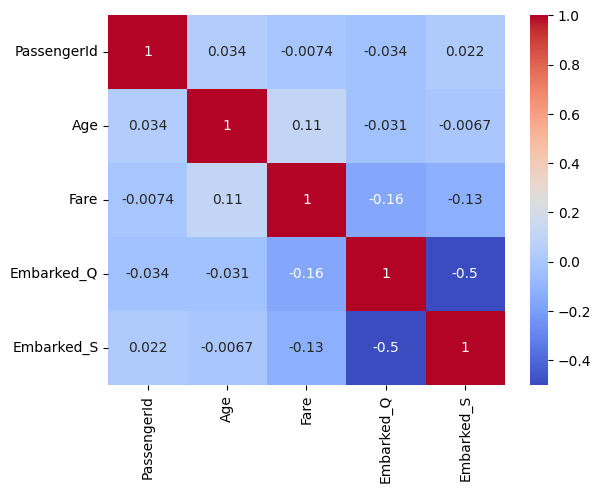

In [2748]:
sns.heatmap(corr_matrix,annot=True, cmap='coolwarm')

In [2749]:
df['Sex'] = df['Sex'].map({'male': 1, 'female': 0})

In [2750]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    category
 2   Pclass       891 non-null    category
 3   Name         891 non-null    object  
 4   Sex          891 non-null    category
 5   Age          891 non-null    float64 
 6   SibSp        891 non-null    category
 7   Parch        891 non-null    category
 8   Ticket       891 non-null    object  
 9   Fare         891 non-null    float64 
 10  Cabin        204 non-null    object  
 11  Embarked_Q   891 non-null    Int64   
 12  Embarked_S   891 non-null    Int64   
dtypes: Int64(2), category(5), float64(2), int64(1), object(3)
memory usage: 63.0+ KB


In [2751]:
cols=df[['SibSp','Parch']].columns
df[cols]=df[cols].astype("Int64")

#  Feature Engineering

In [2752]:
df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,2.110213,NaN,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,4.280593,C85,0,0


In [2753]:
df['Title'] = df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
df['Title'] = df['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
df['Title'] = df['Title'].replace('Mlle', 'Miss')
df['Title'] = df['Title'].replace('Ms', 'Miss')
df['Title'] = df['Title'].replace('Mme', 'Mrs')

df = pd.get_dummies(df, columns=['Title'], prefix='Title', dtype='Int64', drop_first=True)

In [2754]:
df['AgeGroup'] = pd.cut(df['Age'], bins=[0, 12, 18, 35, 60, 100],
                        labels=['Child', 'Teen', 'Adult', 'MidAge', 'Senior'])

df = pd.get_dummies(df, columns=['AgeGroup'], dtype='Int64', drop_first=True)

In [2755]:
df['CabinLetter'] = df['Cabin'].str[0].fillna('Unknown')

df = pd.get_dummies(df, columns=['CabinLetter'], prefix='Cabin', dtype='Int64', drop_first=True)

In [2756]:
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

In [2757]:
df['IsAlone'] = (df['FamilySize'] == 1).astype('int64')

In [2758]:
df['FareBand'] = pd.qcut(df['Fare'], 4, labels=['Low', 'Medium', 'High', 'VeryHigh'])

df = pd.get_dummies(df, columns=['FareBand'], prefix='Fare', dtype='Int64', drop_first=True)

In [2759]:
df.drop(['Fare', 'Age', 'SibSp', 'Parch'], axis=1, inplace=True)

# Drop Un-necessary Columns

In [2760]:
df.drop(columns=["PassengerId","Name","Ticket","Cabin"],inplace=True)

In [2761]:
df.head(2)

,Survived,Pclass,Sex,Embarked_Q,Embarked_S,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,AgeGroup_Teen,...,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_Unknown,FamilySize,IsAlone,Fare_Medium,Fare_High,Fare_VeryHigh
0,0,3,1,0,1,0,1,0,0,0,...,0,0,0,0,1,2,0,0,0,0
1,1,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,2,0,0,0,1


In [2762]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 26 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   Survived         891 non-null    category
 1   Pclass           891 non-null    category
 2   Sex              891 non-null    category
 3   Embarked_Q       891 non-null    Int64   
 4   Embarked_S       891 non-null    Int64   
 5   Title_Miss       891 non-null    Int64   
 6   Title_Mr         891 non-null    Int64   
 7   Title_Mrs        891 non-null    Int64   
 8   Title_Rare       891 non-null    Int64   
 9   AgeGroup_Teen    891 non-null    Int64   
 10  AgeGroup_Adult   891 non-null    Int64   
 11  AgeGroup_MidAge  891 non-null    Int64   
 12  AgeGroup_Senior  891 non-null    Int64   
 13  Cabin_B          891 non-null    Int64   
 14  Cabin_C          891 non-null    Int64   
 15  Cabin_D          891 non-null    Int64   
 16  Cabin_E          891 non-null    Int64   
 1

In [2763]:
cols=df.select_dtypes(include=['category']).columns
df[cols]=df[cols].astype("Int64")

# Train Test Split

In [2764]:
df.head(2)

,Survived,Pclass,Sex,Embarked_Q,Embarked_S,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,AgeGroup_Teen,...,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_Unknown,FamilySize,IsAlone,Fare_Medium,Fare_High,Fare_VeryHigh
0,0,3,1,0,1,0,1,0,0,0,...,0,0,0,0,1,2,0,0,0,0
1,1,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,2,0,0,0,1


In [2765]:
df = df.astype({col: 'int64' for col in df.select_dtypes(include='Int64').columns})

In [2766]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 26 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Survived         891 non-null    int64
 1   Pclass           891 non-null    int64
 2   Sex              891 non-null    int64
 3   Embarked_Q       891 non-null    int64
 4   Embarked_S       891 non-null    int64
 5   Title_Miss       891 non-null    int64
 6   Title_Mr         891 non-null    int64
 7   Title_Mrs        891 non-null    int64
 8   Title_Rare       891 non-null    int64
 9   AgeGroup_Teen    891 non-null    int64
 10  AgeGroup_Adult   891 non-null    int64
 11  AgeGroup_MidAge  891 non-null    int64
 12  AgeGroup_Senior  891 non-null    int64
 13  Cabin_B          891 non-null    int64
 14  Cabin_C          891 non-null    int64
 15  Cabin_D          891 non-null    int64
 16  Cabin_E          891 non-null    int64
 17  Cabin_F          891 non-null    int64
 18  Cabin_G   

In [2767]:
df.columns

Index(['Survived', 'Pclass', 'Sex', 'Embarked_Q', 'Embarked_S', 'Title_Miss',
       'Title_Mr', 'Title_Mrs', 'Title_Rare', 'AgeGroup_Teen',
       'AgeGroup_Adult', 'AgeGroup_MidAge', 'AgeGroup_Senior', 'Cabin_B',
       'Cabin_C', 'Cabin_D', 'Cabin_E', 'Cabin_F', 'Cabin_G', 'Cabin_T',
       'Cabin_Unknown', 'FamilySize', 'IsAlone', 'Fare_Medium', 'Fare_High',
       'Fare_VeryHigh'],
      dtype='object')

In [2768]:
x = df.drop('Survived', axis = 1)
y = df['Survived']

In [2769]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [2770]:
param_grid = {
    'n_estimators': [100, 300, 500, 800],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10, 15],
    'min_samples_leaf': [1, 2, 4, 6],
    'criterion': ['gini', 'entropy', 'log_loss'],
    'class_weight': ['balanced', 'balanced_subsample', None]
}


In [2771]:
gb_clf = GradientBoostingClassifier(random_state=42)

param = {
    'n_estimators': [100, 300, 500, 800],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10, 15],
    'min_samples_leaf': [1, 2, 4, 6],
    'subsample': [0.8, 0.9, 1.0],
    'max_features': ['sqrt', 'log2', None]
}

In [2772]:
catboost_clf = CatBoostClassifier(verbose=0, random_state=42)
lightgbm_clf = LGBMClassifier(random_state=42)

In [2773]:
param_catboost = {
    'n_estimators': [100, 300, 500],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'depth': [4, 6, 8, 10],
    'l2_leaf_reg': [1, 3, 5, 7],
    'subsample': [0.8, 0.9, 1.0],
    'random_strength': [0.1, 0.5, 1.0],
    'border_count': [32, 64, 128]
}

param_lightgbm = {
    'n_estimators': [100, 300, 500],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'num_leaves': [31, 62, 127, 255],
    'max_depth': [5, 7, 10, -1],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
    'reg_alpha': [0, 0.1, 0.5],
    'reg_lambda': [0, 0.1, 0.5]
}

In [2774]:
catboost_tuned = RandomizedSearchCV(
    estimator=catboost_clf,
    param_distributions=param_catboost,
    n_iter=30,
    scoring='accuracy',
    cv=5,
    n_jobs=-1,
    verbose=1,
    random_state=42
)

lightgbm_tuned = RandomizedSearchCV(
    estimator=lightgbm_clf,
    param_distributions=param_lightgbm,
    n_iter=30,
    scoring='accuracy',
    cv=5,
    n_jobs=-1,
    verbose=1,
    random_state=42
)

In [2775]:
voting_clf = VotingClassifier(
    estimators=[
        ("xgb", XGBClassifier(eval_metric='logloss', use_label_encoder=False)),
        ("catboost", catboost_tuned),
        ("lightgbm", lightgbm_tuned),
        ("rf", RandomForestClassifier())
    ],
    voting='soft'  
)

In [2776]:
stacking_clf = StackingClassifier(
    estimators=[
        ("lr", LogisticRegression(max_iter=1000)),
        ("xgb", XGBClassifier(eval_metric='logloss', use_label_encoder=False)),
        ("rf", RandomForestClassifier())
    ],
    final_estimator=GradientBoostingClassifier()
)

In [2777]:
extra_trees_clf = ExtraTreesClassifier()

hist_gb_clf = HistGradientBoostingClassifier()

In [2778]:
rf_model = RandomForestClassifier(
    n_estimators=300,       
    max_depth=8,           
    min_samples_split=5,   
    min_samples_leaf=2,    
    max_features='sqrt',     
    bootstrap=True,            
    random_state=42,
    n_jobs=-1            
)

In [2779]:
models = [
    
    ('Random Forest Classifier', rf_model),
    
    ('XG Boost random_state', XGBClassifier(eval_metric='logloss', use_label_encoder=False, random_state=42)),
    
    ('Cat Boost Classifier', CatBoostClassifier(verbose=0, random_state=42)),
    
    ('Logistic Regression', LogisticRegression(max_iter=1000,n_jobs=-1)),
    
    ("XG Boost", XGBClassifier(eval_metric='logloss', use_label_encoder=False)),
    
    ("Random Forest Classifier", RandomForestClassifier(n_estimators=100, random_state=42)),
        
    ("SVM", SVC()),
    
    ("Cat Boost", catboost_tuned),
    
    ("Light GBM", lightgbm_tuned),

    ("KNN", KNeighborsClassifier(n_jobs=-1)),

    ("Grid Search CV",GridSearchCV(RandomForestClassifier(), param_grid=param_grid, cv=5,
                      scoring='accuracy', n_jobs=-1)),
    
    ("grid_search_Boost" , GridSearchCV(estimator=gb_clf, param_grid=param,
                            scoring='accuracy', cv=5, n_jobs=-1,verbose=2 )),
    
    ("random_search_Boost" , RandomizedSearchCV( estimator=gb_clf,
    param_distributions=param, n_iter=30, 
    scoring='accuracy', cv=5, n_jobs=-1, verbose=2, random_state=42 )),
    
    ("Voting Classifier", voting_clf),
    
    ("Stacking Classifier", stacking_clf),
    
    ("Extra Trees", extra_trees_clf),
    
    ("Hist Gradient Boosting", hist_gb_clf),
    
    ("Gradient Boosting", GradientBoostingClassifier()),
    
    ("Hist Gradient Boosting", HistGradientBoostingClassifier()),
    
    ("MLP Neural Net", MLPClassifier(max_iter=1000)),
    
    ("Stacking", StackingClassifier(
        estimators=[
            ('rf', RandomForestClassifier()),
            ('xgb', XGBClassifier(eval_metric='logloss', use_label_encoder=False)),
            ('lgb', lightgbm_tuned)
        ],
        final_estimator=LogisticRegression()
    )),
  
]

In [2780]:
results = []
for name, model in models:
    clf = Pipeline(steps=[('model', model)])
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    results.append({
        "Model": name,
        "Accuracy": accuracy_score(y_test, y_pred),
        "F1 Score": f1_score(y_test, y_pred)
    })

Fitting 5 folds for each of 30 candidates, totalling 150 fits
Fitting 5 folds for each of 30 candidates, totalling 150 fits
[LightGBM] [Info] Number of positive: 268, number of negative: 444
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000304 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 48
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.376404 -> initscore=-0.504838
[LightGBM] [Info] Start training from score -0.504838
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No fu

In [2781]:
results_df = pd.DataFrame(results).sort_values(by="Accuracy", ascending=False)
print(results_df)

                       Model  Accuracy  F1 Score
16    Hist Gradient Boosting  0.843575  0.810811
18    Hist Gradient Boosting  0.843575  0.810811
17         Gradient Boosting  0.837989  0.805369
10            Grid Search CV  0.832402  0.802632
20                  Stacking  0.832402  0.794521
2       Cat Boost Classifier  0.832402  0.794521
6                        SVM  0.826816  0.783217
7                  Cat Boost  0.826816  0.786207
12       random_search_Boost  0.826816  0.791946
0   Random Forest Classifier  0.826816  0.786207
9                        KNN  0.821229  0.786667
1      XG Boost random_state  0.821229  0.783784
11         grid_search_Boost  0.821229  0.780822
13         Voting Classifier  0.821229  0.780822
15               Extra Trees  0.821229  0.780822
4                   XG Boost  0.821229  0.783784
19            MLP Neural Net  0.821229  0.783784
5   Random Forest Classifier  0.815642  0.775510
8                  Light GBM  0.810056  0.767123
14       Stacking Cl